## Regression as Neural Networks 

### jey@aims.ac.za


# Module importation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(1337) # for reproducibility
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Dense
from keras import metrics
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow import set_random_seed
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix


%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.0


## Load the dataset

In [ ]:
dataset = pd.read_csv('https://drive.google.com/uc?export=download&id=1_V51YRx3O1A3-BqTIwQmmSo_rfOjgyry', delim_whitespace=True)

In [ ]:

dataset.head()


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
# Your remaining code here.
# Create additional cells and place your code neatly for easy readability. You can add a new cell by clicking on the `+ Code` button on the top left.

In [ ]:
# We convert our dataset to a numpy array
datatrain = dataset.values

In [ ]:
datatrain # visualization

array([[  14.96,   41.76, 1024.07,   73.17,  463.26],
       [  25.18,   62.96, 1020.04,   59.08,  444.37],
       [   5.11,   39.4 , 1012.16,   92.14,  488.56],
       ...,
       [  31.32,   74.33, 1012.92,   36.48,  429.57],
       [  24.48,   69.45, 1013.86,   62.39,  435.74],
       [  21.6 ,   62.52, 1017.23,   67.87,  453.28]])

In [ ]:
datatrain.shape # Checking the shape

(9568, 5)

## Spliting the data into the training and testiting

In [ ]:
X = datatrain[:,0:4]
Y = datatrain[:,4]

In [ ]:
X.shape

(9568, 4)

In [ ]:
Y.shape

(9568,)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=.3)

In [ ]:
print (X_train.shape)
print (Y_train.shape)

(4687, 4)
(4687,)


In [ ]:
print(X_val.shape)
print (Y_val.shape)

(2010, 4)
(2010,)


In [ ]:
print(X_test.shape)
print (Y_test.shape)

(2871, 4)
(2871,)


# 3

# 4. Training various networks

## Create networks

### Network1

In [ ]:
def network1():
    """ This function create a simple network of one layer with 4 inputs and 1
    outputs"""
    model = Sequential()
    model.add(Dense(4, input_dim=4, activation='relu'))
    # add a fully connected layer for the output
    # When an activation function is not specified Keras will use a linear one
    model.add(Dense(1))
    
    # Compile model
    model.compile(loss='mean_squared_error', 
                  optimizer='adam',
                  metrics=[metrics.mse])
    
    return model

**network1**: simple network with one layer, 4 inputs(4 features) and 4 filters between the inputs and the 1 outputs. the activation fuction used is "**relu**"  for the output.

  Validation performance on the training was: the mean square error is 191523.55 it is too much huge.

### Network2

In [ ]:
def network2():
    """ This function create a network of 2 layers with 4 inputs and 1
    outputs"""
  
    model = Sequential()
    model.add(Dense(4, input_dim=4, activation='relu'))
    model.add(Dense(2, activation='relu'))

    # add a fully connected layer for the output
    # When an activation function is not specified Keras will use a linear one
    model.add(Dense(1))
    
    # Compile model
    model.compile(loss='mean_squared_error', 
                  optimizer='adam',
                  metrics=[metrics.mse])
    
    return model

**network2**: network with 3 layers, 4 inputs and 4 output  for layer 1, 4 inputs and 2 output  for layer 2 and 2 inputs and 1 output  for the last layer. the activation fuctions used are "relu".

Validation performance: this time the mean square error is small then the previous one: 29.57 .



### Network3

In [ ]:
def network3():
    """ This function create a  network of 3 layers with 4 inputs and 1
    outputs"""
    model = Sequential()
    model.add(Dense(4, input_dim=4, activation='relu'))
    model.add(Dense(2, activation='relu'))
    model.add(Dense(3, activation='linear'))

    # add a fully connected layer for the output
    # When an activation function is not specified Keras will use a linear one
    model.add(Dense(1))
    
    # Compile model
    model.compile(loss='mean_squared_error', 
                  optimizer='adam',
                  metrics=[metrics.mse])
    
    return model

**network3**: network with 4 layers, 4 inputs and 4 filters in layer 1, 4 inputs and 2 filters in layer 2, 2 inputs and 3 filters in layer 3, 3 inputs and 1 outputs for the last layer.  All layer are fully connected the activation fuctions used are respectively "relu","relu" and "lnear".

  Validation performance on the training was : the mean square error was approximatively the same as the network2: 27.42 .

## Choice of the model

Due to the validation performance, we prefer to use **network3** for the testing of our data

# 5 Display and validation

## Testing the model

### Initialise the model

In [ ]:
model = network3()

### Determine the number of trainable parameters


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 4         
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


### Fit the model

In [ ]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=30, batch_size=8, verbose=1)

Train on 4687 samples, validate on 2010 samples
Epoch 1/30
4687/4687 [==============================] - 1s 275us/step - loss: 29853.3098 - mean_squared_error: 29853.3098 - val_loss: 344.3661 - val_mean_squared_error: 344.3661
Epoch 2/30
4687/4687 [==============================] - 1s 166us/step - loss: 321.8311 - mean_squared_error: 321.8311 - val_loss: 312.9820 - val_mean_squared_error: 312.9820
Epoch 3/30
4687/4687 [==============================] - 1s 171us/step - loss: 282.4791 - mean_squared_error: 282.4791 - val_loss: 264.6281 - val_mean_squared_error: 264.6281
Epoch 4/30
4687/4687 [==============================] - 1s 170us/step - loss: 235.8016 - mean_squared_error: 235.8016 - val_loss: 224.4161 - val_mean_squared_error: 224.4161
Epoch 5/30
4687/4687 [==============================] - 1s 178us/step - loss: 185.3875 - mean_squared_error: 185.3875 - val_loss: 167.2574 - val_mean_squared_error: 167.2574
Epoch 6/30
4687/4687 [==============================] - 1s 165us/step - loss: 

### Predict on the validation data

In [ ]:
val_prediction = model.predict(X_val) # prediction of the validation data

#### View of the top 5

In [ ]:
val_prediction[0:5] # View of the top 5 of the prediction

array([[461.12292],
       [454.2865 ],
       [475.78912],
       [435.8563 ],
       [466.34805]], dtype=float32)

In [ ]:
Y_val[0:5] # view of the top 5 of the real value

array([460.19, 456.44, 472.86, 434.56, 466.24])

### Mean squared error on the validation data


In [ ]:
mean_squared_error(Y_val, val_prediction)

27.4243730067575

## Predicition on the testing data

In [ ]:
test_prediction = model.predict(X_test) # The test prediction on the testing data

In [ ]:
test_prediction # Visualization of the prediction

array([[436.253  ],
       [468.25235],
       [483.37073],
       ...,
       [456.00943],
       [449.24893],
       [480.26785]], dtype=float32)

In [ ]:
Y_test # The true value

array([441.9 , 466.71, 476.9 , ..., 460.1 , 449.98, 482.79])

### Mean squared error on the testing data

In [ ]:
mean_squared_error(Y_test, test_prediction)

26.344707849838258

#  6. Plot

In [ ]:
def plot_hist(h, xsize=6, ysize=10):

    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True)
    
    # summarize history for Accuracy
    plt.subplot(211)
    plt.plot(h['mean_squared_error'])
    plt.plot(h['val_mean_squared_error'])
    plt.title('Training Performance')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='best')
    
    plt.draw()
    plt.show()

    return

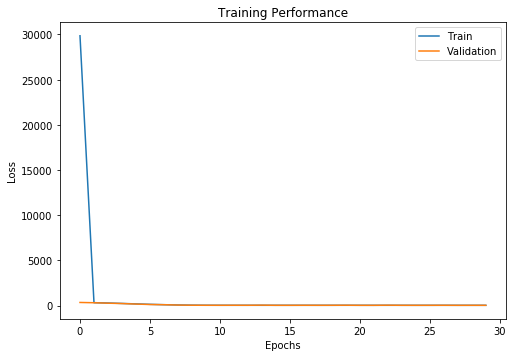

In [ ]:
plot_hist(history.history, xsize=8, ysize=12)

# 7. 

## Save the model to the local disk

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

Save the model's weights to the local disk

In [ ]:
model.save_weights("model_weights.h5")

### Load the model back into memory

In [ ]:
json_file = open('model.json', 'r')
loaded_model_as_json = json_file.read()
json_file.close()
restored_model = model_from_json(loaded_model_as_json)

### Load the weights back into memory

In [ ]:
restored_model.load_weights("model_weights.h5")

### Re-compile the model

In [ ]:
restored_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Resume training, predict or perform other tasks


In [ ]:
restored_model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=2, batch_size=8, verbose=1) 

Train on 4687 samples, validate on 2871 samples
Epoch 1/2
4687/4687 [==============================] - 2s 333us/step - loss: -7228.9168 - acc: 4.2671e-04 - val_loss: -7221.5306 - val_acc: 0.0028
Epoch 2/2
4687/4687 [==============================] - 1s 203us/step - loss: -7228.9168 - acc: 4.2671e-04 - val_loss: -7221.5306 - val_acc: 0.0028


## Prediction using the restored model

In [ ]:
val_prediction_restored = restored_model.predict(X_test) # prediction of the validation data

### Checking the value

In [ ]:
mean_squared_error(Y_test, val_prediction_restored)

26.344707849838258

## Notice

We can notice that the mean squared error of the restored model on the testing data stay the same as the we found above

# Tasks

1) Read in the dataset. You have to decide on the correct delimiter otherwise you will not be able to proceeed. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html The target variable is called `PE`.

2) Split the data into training, validation and testing.

3) Perform any pre-processing you wish and explain your reasoning.

4) Train various neural networks. Write down in a cell using the `+ Text` button which models you tried and all the hyper-parameter your tried and what the validation performance was. You don't have to list all trials, just list three ones you explored. Discuss your findings. Then motivate your choice for the best model and evaluate on the testing data.

5) Display the training, validation and test performance (you can use mean squared error).

6) Plot the training and validation mean squared error. Did the model under-fit or overfit, or was it just right? Explain your reasoning.

7) After doing everything above, go to this notebook: https://colab.research.google.com/drive/1FqFpIKMj0BxbKsa0qtGwsON5sRnaYuQX and look at how to save a model/weights and how to re-load them. For this task you will need to save your best model/weights, reload them, re-compile the model and resuming training for 2 epochs. This exercise teaches you how to save and load a model/weights. This is useful when you train a model on a particular computer and want to execute the predictions on another computer/server.

**Save and name your notebooks appropriately as follows: firstname_lastname_assign_2.**

Share both your notebook with me by clicking on the Share button on the top right. Share it to this email: dufourq@aims.ac.za

**Notes**

You will be assessed on your ability to perform steps: 2, 3, 4, 5, 6 and 7. It is always good practice to comment your code, you will be assessed on your ability to produce clean and commented code that is easy to follow. You will also get marks for displaying outputs to the screen after doing data manipulations/imports/reshaping/pre-processing/splitting/comments. Your code should be easy to follow for someone who is not an expert in neural networks ( in other words, if you can create your solution to contain as much information as my tutorials then you'll get marks). 

Your model should get at most a mean squared error of 2500. Lower is better.

In [ ]:
<font size='4' color='red'>

Correct, however, data have to be scaled.    

</font>